<a href="https://colab.research.google.com/github/nikitasharma1998/capstone-project-in-hotel-booking-analysis/blob/main/Capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Project name**- Hotel Booking Analysis
##### **Contribution**    - Individual
##### **Team Member 1 -**-Nikita sharma

# **Project Summary -**

Write the summary here within 500-600 words.

The Hotel booking analysis project aims to explore and analyse data related to hotel bookings to derive insights that can inform decision-making and improve business operations within hospitality industry.By examining various aspects of hotel booking such as booking patterns ,customer prefrences,seasonal trends and revenue generation,the project seeks to uncover valueable information that can enhance marketing strategies,resource optimization and enhance customers satisfaction.  


# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/nikitasharma1998/capstone-project-in-hotel-booking-analysis

# **Problem Statement**


**Write Problem Statement Here.**

Booking analysis

Customer segmentation

Revenue analysis

Booking cancellation analysis

Predictive analysis

#### **Define Your Business Objective?**

**Analysis booking trends**-explore patterns in booking volume over time,including seasonal variations,peak booking periods and trends influenced by external factors such as holidays or events.

**Customer segmentation**-identify different customer segments based on booking behavior,demographics,prefrences and booking channels.

**Revenue analysis**-Examine revenue generated from different booking channels,room types and customers segments to identify revenue drivers and oppurtunities for optimization.

**Booking cancellation analysis**-analyze the frequency and reason for booking cancellations to understand potential areas for improvement in customer services and  booking policies.

**Predictive analysis**-develop predictive models to forecast future booking trends, cancellation rates and revenue trends to assist in capacity planning and revenue management

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load Dataset
df_hotels=pd.read_csv('/Hotel Bookings-2.csv')
df_hotels.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset First View

In [8]:
# Dataset First Look
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count

print("Number of columns present:-", len(df_hotels.columns))
print("Number of rows present:-",len(df_hotels))


Number of columns present:- 32
Number of rows present:- 81537


### Dataset Information

#### Duplicate Values

In [11]:
# Dataset Info
df_hotels.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [12]:
# Dataset Duplicate Value Count
df_hotels.duplicated()













0        False
1        False
2        False
3        False
4        False
         ...  
81532    False
81533     True
81534     True
81535     True
81536    False
Length: 81537, dtype: bool

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df_hotels.isna().sum(axis=0)



hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12057
company                           76928


In [14]:
#number of unique values
df_hotels.nunique(axis=0)

hotel                                2
is_canceled                          2
lead_time                          478
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            153
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     19
deposit_type                         3
agent                              284
company                            292
days_in_waiting_list     

In [15]:
for i in df_hotels.columns:
  if df_hotels[i].isna().sum() != 0:
    print('null values in', i, 'column :', df_hotels[i].isna().sum() )

null values in children column : 4
null values in country column : 487
null values in agent column : 12057
null values in company column : 76928


In [16]:
# Visualizing the missing values
df_hotels.describe()




,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81533.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,69480.000000,4609.000000,81537.000000,81537.000000,81537.000000,81537.000000
mean,0.530520,112.695206,2016.041122,28.165471,15.699327,0.983210,2.669708,1.857034,0.101799,0.008548,0.034083,0.113004,0.153562,0.203956,113.561888,196.211543,2.875713,98.060807,0.071820,0.469860
std,0.499071,112.343339,0.754119,13.652905,8.785585,1.051007,2.073458,0.597639,0.398340,0.103358,0.181443,1.010728,1.680099,0.634970,119.083391,135.180733,20.257558,54.185302,0.262151,0.747791
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,202.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<ipython-input-17-71c42d6d304d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_hotels.corr(), annot=True, cmap='Reds', linewidths=5)


Text(0.03, 0.98, 'Correlation Between Variables')

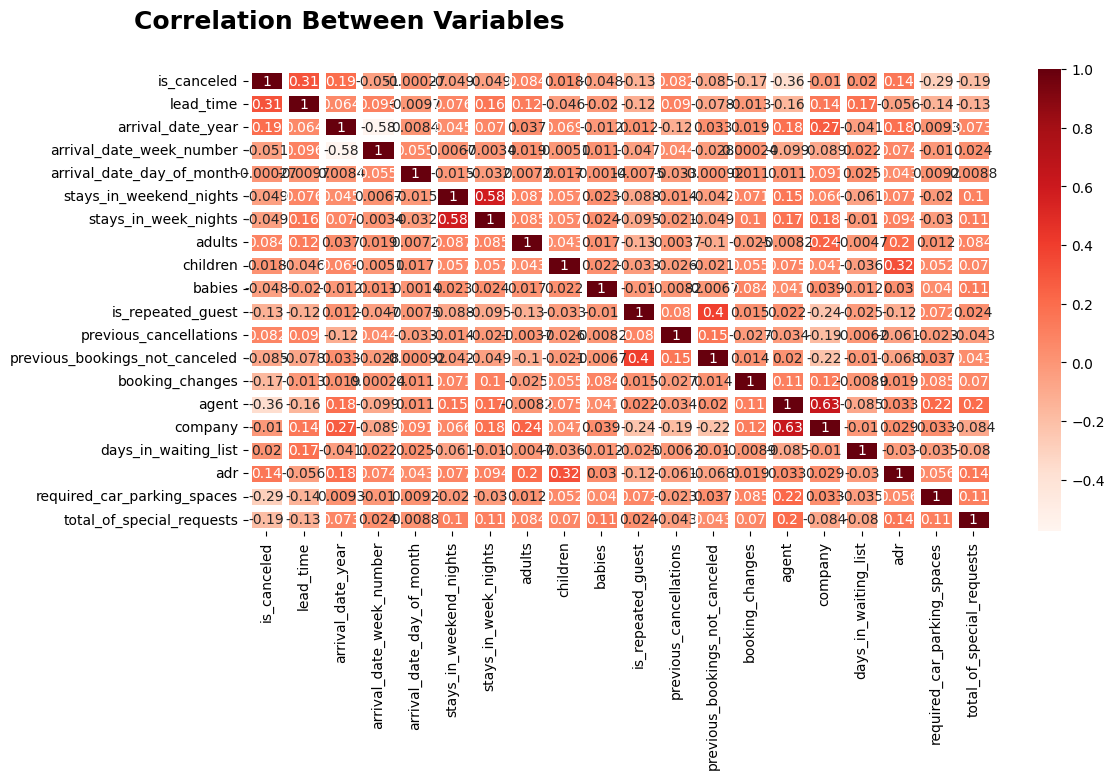

In [17]:
plt.rcParams['figure.figsize'] =(12, 6)
sns.heatmap(df_hotels.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy',
             x=0.03, y=0.98, ha = "left", fontsize='18',
             fontfamily='sans-serif', color= "black")

<ipython-input-18-e0f7b848066f>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_hotels.corrwith(df_hotels["is_canceled"]).iloc[:-1].to_frame ()


<Axes: >

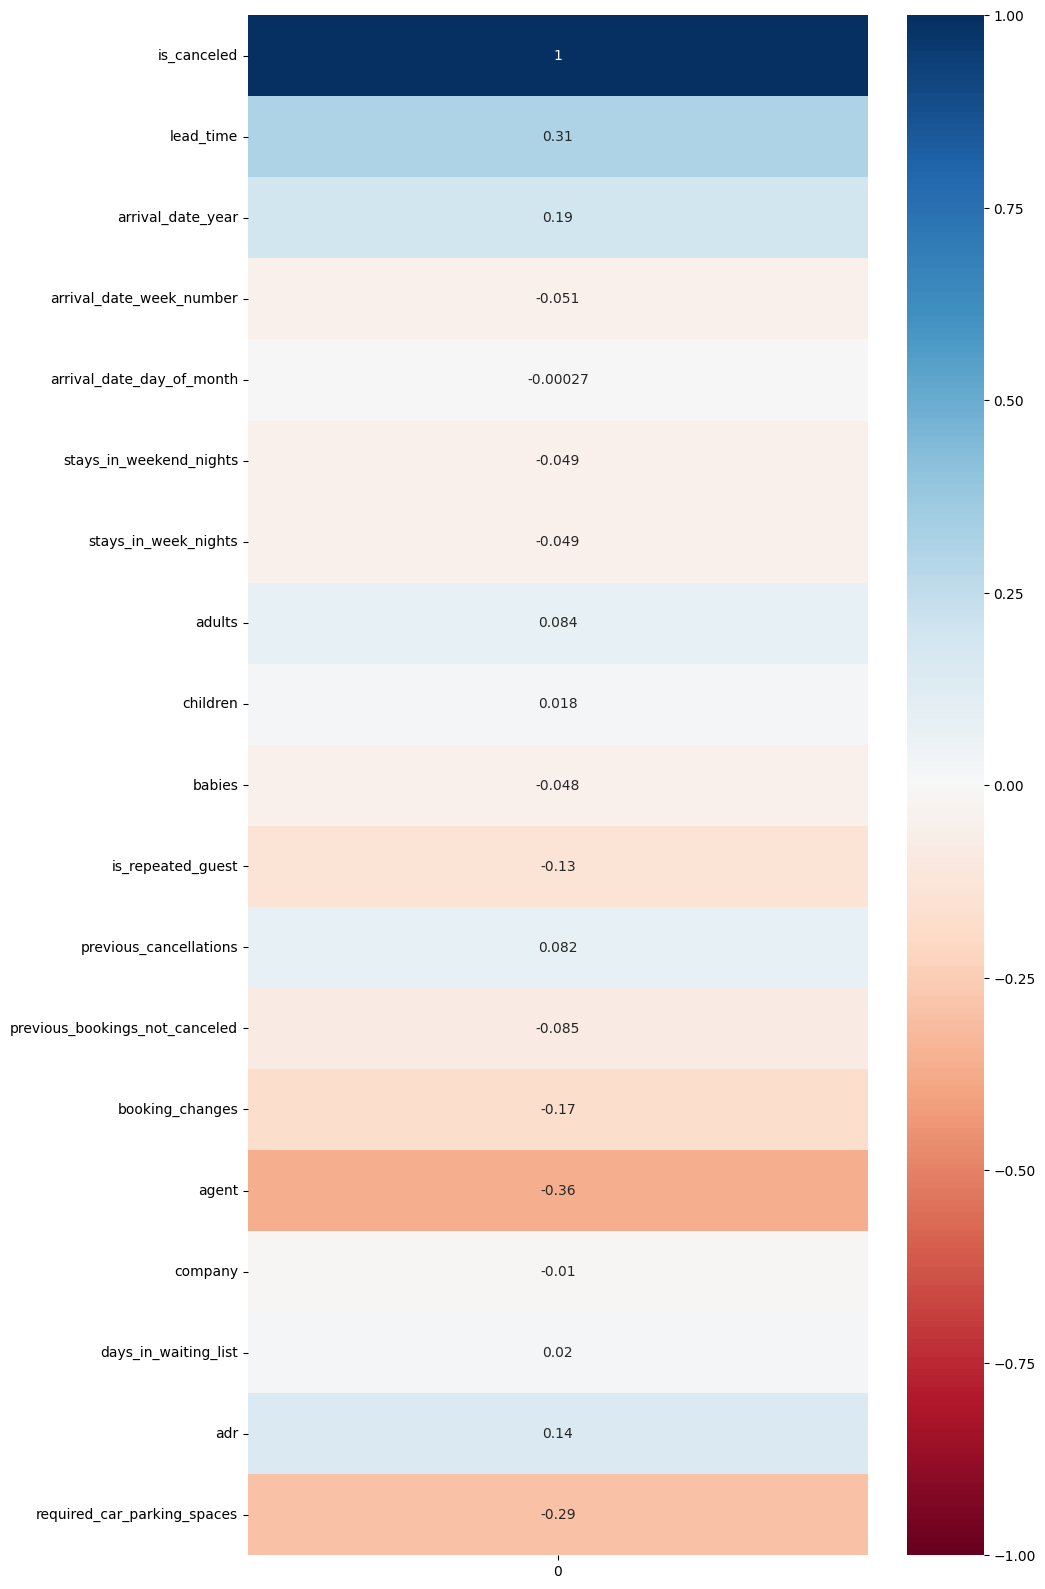

In [18]:
corr = df_hotels.corrwith(df_hotels["is_canceled"]).iloc[:-1].to_frame ()
fig, ax = plt.subplots(figsize= (10,20))
sns.heatmap (corr, cmap='RdBu', annot=True, vmin=-1, vmax=1, ax=ax)

### What did you know about your dataset?

we can see in our dataset that Correlation reports can be highly useful for hotels as it will give a quick and easy-to-interpret overview of which variables and which departments have the most impact on NPS® and your guests’ likeliness to recommend your hotel. It can help with determining resource allocation more effectively, understanding your guests and where to prioritise marketing efforts, and spotting market trends. Despite the usefulness of correlation reports, they should be used with a hint of caution and not necessarily be the only deciding factor for making key operations. It’s just as important to dive deeper in order to really understand the why behind the correlation coefficient and understanding the practical importance of the correlation.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
df_hotels.columns



Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [19]:
# Dataset Describe
df_hotels.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81533.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,69480.000000,4609.000000,81537.000000,81537.000000,81537.000000,81537.000000
mean,0.530520,112.695206,2016.041122,28.165471,15.699327,0.983210,2.669708,1.857034,0.101799,0.008548,0.034083,0.113004,0.153562,0.203956,113.561888,196.211543,2.875713,98.060807,0.071820,0.469860
std,0.499071,112.343339,0.754119,13.652905,8.785585,1.051007,2.073458,0.597639,0.398340,0.103358,0.181443,1.010728,1.680099,0.634970,119.083391,135.180733,20.257558,54.185302,0.262151,0.747791
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,202.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

**VARIABLES ARE**-

'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'
       
       as all the name are they tell something about describing the various customers prefrences

### Check Unique Values for each variable.

In [57]:
# Check Unique Values for each variable.
print(df_hotels['hotel'].unique())
print(df_hotels['is_canceled'].unique())
print(df_hotels['lead_time'].unique())
print(df_hotels['arrival_date_year'].unique())
print(df_hotels['arrival_date_month'].unique())
print(df_hotels['arrival_date_week_number'].unique())
print(df_hotels['arrival_date_day_of_month'].unique())
print(df_hotels['stays_in_weekend_nights'].unique())
print(df_hotels['stays_in_week_nights'].unique())
print(df_hotels['adults'].unique())
print(df_hotels['children'].unique())
print(df_hotels['babies'].unique())
print(df_hotels['meal'].unique())
print(df_hotels['country'].unique())
print(df_hotels['market_segment'].unique())
print(df_hotels['distribution_channel'].unique())
print(df_hotels['is_repeated_guest'].unique())
print(df_hotels['previous_cancellations'].unique())
print(df_hotels['previous_bookings_not_canceled'].unique())
print(df_hotels['reserved_room_type'].unique())
print(df_hotels['assigned_room_type'].unique())
print(df_hotels['booking_changes'].unique())
print(df_hotels['deposit_type'].unique())
print(df_hotels['agent'].unique())
print(df_hotels['company'].unique())
print(df_hotels['days_in_waiting_list'].unique())
print(df_hotels['customer_type'].unique())
print(df_hotels['adr'].unique())
print(df_hotels['required_car_parking_spaces'].unique())
print(df_hotels['total_of_special_requests'].unique())
print(df_hotels['reservation_status'].unique())
print(df_hotels['reservation_status_date'].unique())



['Resort Hotel' 'City Hotel']
[0 1]
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 21

## 3. ***Data Wrangling***

### Data Wrangling Code

In [61]:
# Write your code to make your dataset analysis ready.
df_hotels.shape

(81537, 32)

In [62]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81537 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81537 non-null  object 
 1   is_canceled                     81537 non-null  int64  
 2   lead_time                       81537 non-null  int64  
 3   arrival_date_year               81537 non-null  int64  
 4   arrival_date_month              81537 non-null  object 
 5   arrival_date_week_number        81537 non-null  int64  
 6   arrival_date_day_of_month       81537 non-null  int64  
 7   stays_in_weekend_nights         81537 non-null  int64  
 8   stays_in_week_nights            81537 non-null  int64  
 9   adults                          81537 non-null  int64  
 10  children                        81533 non-null  float64
 11  babies                          81537 non-null  int64  
 12  meal                            

In [63]:
#converting datatype of "reservation_status_date" from object to datatime
df_hotels['reservation_status_date'] = pd.to_datetime(df_hotels['reservation_status_date'])
df_hotels['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 81537 entries, 0 to 81536
Series name: reservation_status_date
Non-Null Count  Dtype         
--------------  -----         
81537 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 637.1 KB


In [64]:
#Creating a new column by combining the year, month, and date of arrival together
df_hotels['Arrival date'] = pd.to_datetime(df_hotels.arrival_date_year.astype(str) + '/' + df_hotels.arrival_date_month.astype(str) + '/' + df_hotels.arrival_date_day_of_month.astype(str))
df_hotels['Arrival date']

0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-01
           ...    
81532   2016-06-09
81533   2016-06-09
81534   2016-06-09
81535   2016-06-09
81536   2016-06-09
Name: Arrival date, Length: 81537, dtype: datetime64[ns]

In [66]:
#Find the number of missing values in every column
np.sum(df_hotels.isnull()).sort_values(ascending= False)

company                           76928
agent                             12057
country                             487
children                              4
hotel                                 0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
days_in_waiting_list                  0
previous_bookings_not_canceled        0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
reservation_status_date               0
reserved_room_type                    0
is_repeated_guest                     0
previous_cancellations                0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0


In [67]:
#finding the indices of missing values
df_hotels.children[df_hotels.children != df_hotels.children].index.values

array([40600, 40667, 40679, 41160])

In [70]:
# Removing unwanted columns
for col in df_hotels.columns:
    if np.sum(df_hotels[col].isnull())>(df_hotels.shape[0] * 0.7):
        df_hotels.drop(columns= col, inplace=True, axis =1)
print(df_hotels.shape)

df_hotels.drop(columns=["arrival_date_week_number", "arrival_date_year","arrival_date_month", "arrival_date_day_of_month"], inplace=True, axis=1)
df_hotels.shape


(81537, 32)


(81537, 28)

In [71]:
#Removing unwanted rows
df_hotels.dropna(subset=["agent"], inplace=True)
df_hotels.shape

(69480, 28)

In [72]:
#Filling missing values of columns
df_hotels['children'].fillna(value = df_hotels['children'].mean(), inplace=True)
df_hotels['children'] = df_hotels['children'].apply(np.floor)
np.sum(df_hotels.children.isnull())

arr = ["market_segment", "distribution_channel", "meal", "country"]
for x in arr:
    df_hotels[x].fillna(method="bfill", inplace = True)

np.sum(df_hotels.isnull())

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
Arrival date                

### What all manipulations have you done and insights you found?

we have first shape the data then convert datatype of "reservation_status_date" from object to datatime after that we Create a new column by combining the year, month, and date of arrival together then we find the number of missing values in every column then we find the indices of missing values after that we  Remove unwanted columns then we remove unwanted rows then we fill the missing value of columns . all this helps in filling the values and clearing the unwanted elemnts from the data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***